# Hausaufgabe 3
## Particle Image Velocimetry
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Zur Charakterisierung der Bewegung in einem Strömungsfeldes findet häufig das optische Messverfahren [Particle Image Velocimetry (PIV)](https://de.wikipedia.org/wiki/Particle_Image_Velocimetry) Anwendung.
Hierfür werden in das Fluid eingebrachte Partikel mit einem zur Ebene aufgeweiteten Laserstrahl beleuchtet und in kurzen Abständen nacheinander fotografiert.
Aus der Ortsveränderung der Partikel und dem bekannten Abstand zwischen den Aufnahmen können die Geschwindigkeitsvektoren bestimmt werden.

Es sollen Funktionen geschrieben werden, mit deren Hilfe sich Berechnung und Visualisierung eines Geschwindigkeits-Vektorfeldes basierend auf zwei aufgenommenen Bildern realisieren lassen.

Zunächst werden einige Module importiert, die hilfreiche Funktionen zur Verfügung stellen:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

**1) Schreiben Sie eine Funktion *loaddata()* die zwei Arrays mit (Bildhöhe) $\times$ (Bildbreite) Einträgen zurückgibt, die die Bildinformationen (Helligkeitswerte als Zahl) enthalten.**

  * Als Parameter sollen hierfür zwei Dateipfade übergeben werden. Das Einlesen kann z.B. mittels [imread](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html) geschehen.
  * Eventuell im Bild enthaltene Farbinformationen sind hier nicht weiter von Interesse. Sind im Bild mehrere Farbkanäle pro Pixel enthalten (z.B. RGB), soll die Information auf einen Kanal reduziert werden.
  * Es soll direkt überprüft werden, ob beide Bilder dieselben Abmaße haben. Andernfalls ist eine Fehlermeldung auszugeben: 
  ```python 
        raise ValueError('Dimensions of input images do not match!')
  ```

In [2]:
# Hier eigenen Code schreiben ...
#from numpy import array, sin, cos, pi, dot, linspace, arange, newaxis, mean
#from numpy.random import randn
#from matplotlib.pyplot import figure, plot, axis, grid, imshow, show, legend
import os

os.chdir(r'C:\Users\Admin\Dropbox\TU Berlin\Master\Semester 6\Python-Ing\Woche 6')
os.getcwd()

Bild=plt.imread(r'C:\Users\Admin\Dropbox\TU Berlin\Master\Semester 6\Python-Ing\Woche 6\img\A001_1.tif')


## Funktion ließt zwei Bilder ein und rechnet diese um in Schwarz-Weiß
def loaddata(Pfad1 , Pfad2):
    
    Bild1=plt.imread(Pfad1)
    Bild2=plt.imread(Pfad2)
    
    if Bild1.shape==Bild2.shape:
        
        if len(Bild1.shape)!=2:

            SW1 = Bild1[:, :, 0]
            SW2 = Bild2[:, :, 0]
            for i in range(1, Bild1.shape[-1]):        

                SW1 = SW1 + Bild1[:, :, i]
                SW2 = SW2 + Bild2[:, :, i] 

            SW1 = SW1 // Bild1.shape[-1]
            SW2 = SW2 // Bild2.shape[-1]

        else:
            SW1 = Bild1
            SW2 = Bild2
        
        return SW1, SW2
    
    else:
        raise ValueError('Dimensions of input images do not match!')

**2) Testen Sie das Laden der Dateien. Die verwendeten Dateien finden Sie im separaten Archiv "*img_HA3.zip*".**

  * **Geben Sie die Dimensionen der zurückgegebenen Arrays an, wenn Sie als Input die folgenden Dateipaare verwenden:**

|Bild 1| Bild 2|
|-|-|
|[B005_1.tif](http://www.pivchallenge.org/pub/index.html#b)|[B005_2.tif](http://www.pivchallenge.org/pub/index.html#b)|
|[B038a.bmp](http://www.pivchallenge.org/pub03/index.html#b)|[B038b.bmp](http://www.pivchallenge.org/pub03/index.html#b)|
|[B_010.TIF](http://www.pivchallenge.org/pub05/index.html#b)|[B_014.TIF](http://www.pivchallenge.org/pub05/index.html#b)|
|[A001_1.tif](http://www.pivchallenge.org/pub/index.html#a)|[A001_2.tif](http://www.pivchallenge.org/pub/index.html#a)|
|[A045a.tif](http://www.pivchallenge.org/pub03/index.html#a)|[A045b.tif](http://www.pivchallenge.org/pub03/index.html#a)|

  * **Überprüfen Sie das Verhalten Ihrer Funktion, wenn folgendes Dateipaar geladen wird:**
  
|Bild 1| Bild 2|
|-|-|
|[B038a.bmp](http://www.pivchallenge.org/pub03/index.html#b)|[A001_1.tif](http://www.pivchallenge.org/pub05/index.html#c)|

Die Bilddateien sind Testfälle der "PIV Challenge"-Benchmark-Initiative (http://www.pivchallenge.org/). Die Quellen der jeweiligen Bilder sind in der Tabelle verlinkt.

In [3]:

# B005_1.tif und B005_2.tif
B005_1, B005_2 = loaddata( 'img/B005_1.tif' , 'img/B005_2.tif' )

print('Die Dimension der Bilder B005_1.tif und B005_2.tif sind', B005_1.shape )

# B038a.bmp und B038b.bmp
B038a, B038b = loaddata( 'img/B038a.bmp' , 'img/B038b.bmp' )

# B_010.TIF und B_014.TIFB_010, B_014 = loaddata( 'B_010.TIF' , 'B_014.TIF' )

# A001_1.tif und A001_2.tif
A001_1, A001_2 = loaddata( 'img/A001_1.tif' , 'img/A001_2.tif' )

# A045a.tif und A045b.tif
A045a, A045b = loaddata( 'img/A045a.tif' , 'img/A045b.tif' )


#Testpaar B038a.bmp	und A001_1.tif
B038a, A001_1 = loaddata( 'img/B038a.bmp' , 'img/A001_1.tif' )

Die Dimension der Bilder B005_1.tif und B005_2.tif sind (512, 512)


ValueError: Dimensions of input images do not match!

 * **Laden Sie die Daten aus dem Dateipaar (`B005_1.tif`, `B005_2.tif`) und visualisieren Sie den jeweiligen Array-Inhalt in zwei benachbarten Plots.**

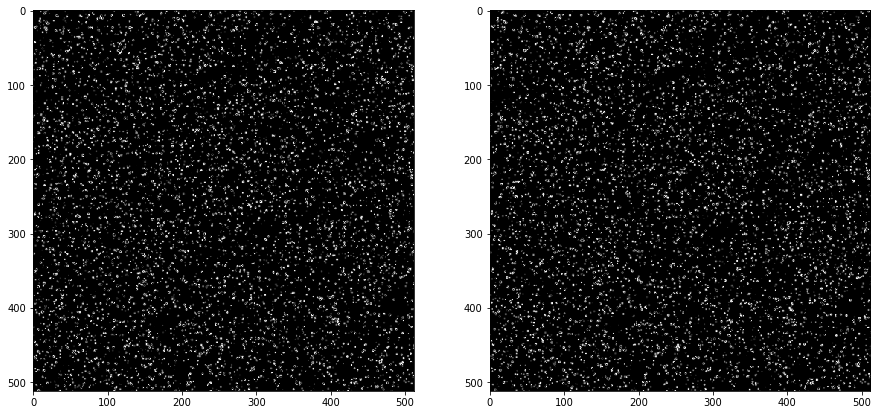

In [4]:
# Hier eigenen Code schreiben ...

fig, ax = plt.subplots(1,2, figsize = (15, 10))

#fig=plt.figure(figsize=(18, 16))
#plt.figure(1,(15,10))

ax[0].imshow(B005_1, cmap='gray')

ax[1].imshow(B005_2, cmap='gray')

**3) Schreiben Sie eine Funktion *piv()*, die zwei Dateipfade übergeben bekommt und basierend auf den Bilddaten ein Geschwindigkeitsvektorfeld berechnet.**

  * **Zusätzlich zu den beiden Dateipfaden sollen optional mindestens folgende Parameter übergeben werden können:**
    * *size_interr_window*: Seitenlänge (in Pixel) des quadratischen Ausschnitts, dessen Bewegung untersucht werden soll. Standardwert: $20$
    * *size_search_window*: Seitenlänge (in Pixel) des quadratischen Ausschnitts, innerhalb dessen die höchste Korrelation gesucht werden soll. Der Wert muss sinnvollerweise mindestens so groß wie *size_interr_window* sein (andernfalls Fehlermeldung ausgeben). Standardwert: *None* (setzen auf *size_interr_window*, falls nicht angegeben)
  * **Folgende Werte sollen zurückgegeben werden:**
    * *X*, *Y*: jeweils 2D-Arrays, die das Pixel-Koordinatengitter zum Vektorfeld definieren.
    * *U*, *V*: jeweils 2D-Arrays (Dimensionen entsprechen (*len(x), len(y)*), die die Geschwindigkeitskomponenten in x- und y-Richtung enthalten.

Hinweise:

  * Sinnvollerweise kann zum Laden der Dateien direkt obige Funktion *loaddata()* verwendet werden.
  * Die Größe des zurückgegebenen Vektorfeldes bestimmt sich aus der Größe der Ausgangsbilder, der Größe der Interrogationsfenster sowie der Suchfenster.
  * Ein mit Nullen gefülltes Array lässt sich z.B. mit NumPys [*zeros()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)-Funktion erzeugen.
  * Die quadratischen *Interrogations*fenster grenzen immer direkt aneinander. Ein zu einem Interrogationsfenster gehörendes *Such*fenster hat den gleichen Mittelpunkt wie das Interrogationsfenster.
  * Eine zweidimensionale Kreuzkorrelation lässt sich z.B. mit den Funktionen [*correlate2d()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html) oder [*fftconvolve()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html) aus dem Paket *scipy.signal* berechnen.
  * Für eine leichtere Fehlersuche ist es sinnvoll, mit Testausgaben (oder -plots) zu überprüfen, ob Zwischenschritte den Erwartungen entsprechen.
  * Um aus einem Vektor mit x-Koordinaten und einem Vektor mit y-Koordinaten ein 2D-Gitter aufzuspannen (auf dem alle x- und y-Koordinaten kombiniert werden), kann die NumPy-Funktion [*meshgrid()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) verwendet werden.

    

In [5]:
# Hier eigenen Code schreiben ...
import scipy.signal
import math


def piv(Pfad1, Pfad2, size_interr_window=20, size_search_window=None):
    
    if size_search_window == None:
        size_search_window= size_interr_window
    
    if size_search_window < size_interr_window :
        raise ValueError('Suchfenster ist kleiner als der gesuchte Bereich')

    else:
        
        
        
        Bild1, Bild2 = loaddata( Pfad1 , Pfad2 )
        
        #Interrogationsfenster sind eine Untermege aus Bild1
        
        #Suchfenster sind eine Untermenge aus Bild 2
        
        
        ## Delete this after
        
        #Test=np.zeros( ( 5 , 5 ) )
        #Test[2,2]=1
        
        
        # Bild2 ist das Bild im nächsten Zeitschritt
        #Test1 = np.zeros( ( 5 , 5 ) )
        #Test1[3,3] = 1 
        
        
        #imshow(Bild1)
        
        Breite = Bild1.shape[1]
        Hoehe  = Bild1.shape[0]
                        
        #Wird immer abgerunded nimmt somit nicht immer das ganze Bild sondern nur das kleinste Vielfache von interwindow < Breite bzw Höhe
        AnteileX = int(Breite/size_interr_window)  # Gebiet wird in X-Richtung in gleich große Anteile unterteilt
        AnteileY = int(Hoehe/size_interr_window )  # Gebiet wird in Y-Richtung in gleich große Anteile unterteilt
        
        # Erstellung der Meshgrids
        X,Y = np.meshgrid( range(0 , AnteileX) , range(0 , AnteileY) )
        
        # Initiallisierung der Geschwindigkeiten mit 0 Einträgen
        U = np.zeros((AnteileY,AnteileX))
        V = np.zeros((AnteileY,AnteileX))
                
        # Alle Untergebiete und das zugehörige Suchfenster werden definiert
        for y in range( 0, AnteileY ):
            for x in range( 0, AnteileX ): 
                
                #print('x:',x)
                #print('y:',y)
                
                # Interrogationsfensterbereich
                Inter_window=Bild1[ y*size_interr_window : (y+1)*size_interr_window, x*size_interr_window : (x+1)*size_interr_window]
                
                #print('Inter_window:',Inter_window)
                                                
                # Falls das Suchfenster größer ist als das Interrogationfenster , so muss dieses am Rand verkleinert werden
                if size_search_window > size_interr_window:
                    
                    # Anfang kürzen
                    if (x) *  size_interr_window - (size_search_window - size_interr_window) // 2  < 0:
                        X_Anf = 0
                    else:
                        X_Anf = size_interr_window *(x) - (size_search_window - size_interr_window) // 2

                    if (y) *  size_interr_window - (size_search_window - size_interr_window) // 2  < 0:
                        Y_Anf=0
                    else:
                        Y_Anf = size_interr_window*(y) - (size_search_window - size_interr_window) // 2
                    
                    
                                       
                    # Enden kürzen
                    if (x+1) *  size_interr_window + (size_search_window - size_interr_window) // 2  > Breite:
                        X_Ende = Breite
                    else:
                        X_Ende = size_interr_window *(x+1) + (size_search_window - size_interr_window) // 2

                    if (y+1) *  size_interr_window + (size_search_window - size_interr_window) // 2  > Hoehe:
                        Y_Ende=Hoehe
                    else:
                        Y_Ende = size_interr_window*(y+1) + (size_search_window - size_interr_window) // 2
                    
                    
                    
                    #print('X_Anf:', X_Anf)
                    #print('Y_Anf:', Y_Anf)
                
                    #print('X_Ende:', X_Ende)
                    #print('Y_Ende:', Y_Ende)
                    
                    #Suchfensterbereich
                    Search_window = Bild2[ Y_Anf : Y_Ende , X_Anf : X_Ende] 
                    
                    
                else: Search_window = Bild2[ y*size_interr_window : (y+1)*size_interr_window, x*size_interr_window : (x+1)*size_interr_window]
                
                
                # Verschiebung beider Bilder um deren Mittel (entscheidener Schritt, da es für die Korrelationsfunktion entscheident ist, dass die Funktionen
                # im Mittel um 0 variieren)
                Inter_window  = Inter_window  - np.mean(Inter_window)
                Search_window = Search_window - np.mean(Search_window)
                
                
                #print('Search_window:', Search_window)
                
                ## Korrelation zwischen Interrogationsfenster und Suchfenster
                cor = signal.correlate2d( Inter_window, Search_window)
                
                                
                
                # Wo liegt das Maximimum der Korrelationsfunktion (hier natürlich diskret)                               
                woMax = np.where(cor == np.amax(cor))
                listOfCordinates = list(zip(woMax[0], woMax[1]))
                                           
                
                # Die Geschwindigkeiten berechnen sich aus dem Mittelpunkt des Interrogationsfensters abzüglich der Koordinaten des Maximums der Korrelationsmatrix    
                U[y,x] = - woMax[1] + (cor.shape[1]-1)/2
                V[y,x] = - woMax[0] + (cor.shape[0]-1)/2

                
                # print('WoMax: ', woMax[1], woMax[0])
                                
        
        return X,Y,U,V   

# Aufruf der Funktion     

path1 = 'img/B_010.tif'
path2 = 'img/B_014.tif'
size_interr = 20
size_search = 40
X,Y,U,V=piv(path1, path2, size_interr_window=size_interr, size_search_window=size_search)
print('done')
# In der Regel wird das Ergebnis (insbesondere für hohe Flussgeschwindigkeiten und hohe Auflösungen) besser, wenn das Suchfenster wesentlich größer ist als das Interrogationsfenster
# Das führt jedoch zu einer wesentlich größeren Matrix, bei der die Bestimmung der Maxima entsprechend länger dauert

done


**4) Erstellen Sie mit Hilfe der *piv()*-Funktion für jeden Datensatz drei Darstellungen:**
  1. Einen Plot mit [Vektorpfeilen](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html), der die Strömungsrichtungen der Partikel(-Gruppen) visualisiert. *Hinweis: Beachten Sie den optionalen Parameter "angles" für eine korrekte Darstellung.*
  2. Eine [Stromlinienvisualisierung](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html).
  3. Einen [Konturplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html), der den Betrag der Geschwindigkeitsverteilung abbildet.

**Variieren Sie die Parameter der *piv()*-Funktion sowie der jeweiligen Plot-Funktion, um eine möglichst aussagekräftige Abbildung zu erhalten. Hinterlegen Sie den Plots zur besseren Übersicht eines der jeweiligen Partikelbilder.**

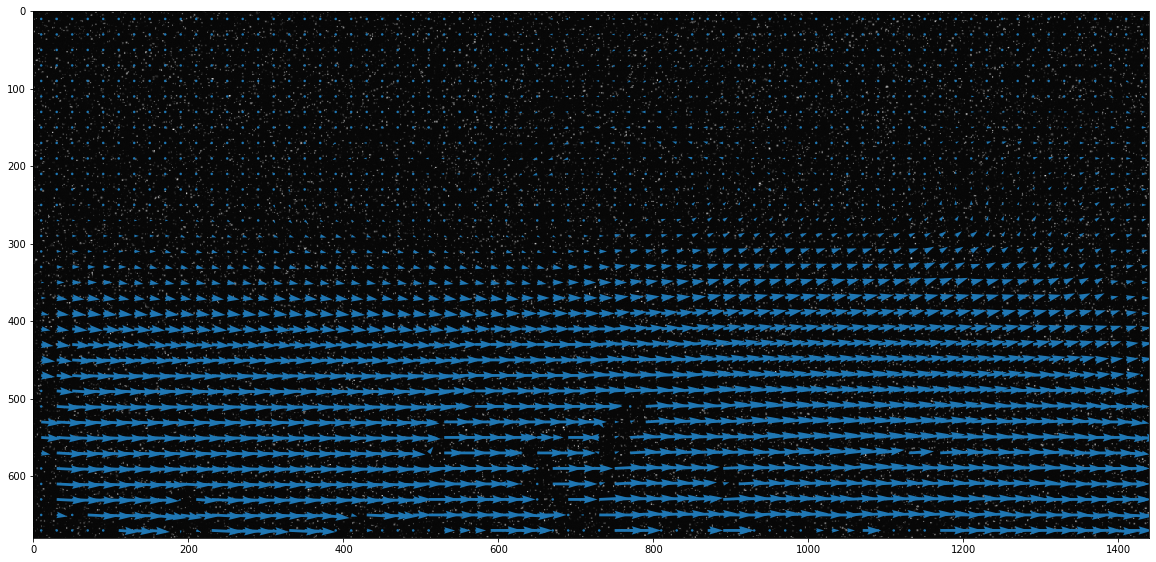

In [8]:
# Für schönere Plots sollte das Ergebnis geglättet werden, damit die Auswirkungen von Ausreißer gemindert werden

U_med = signal.medfilt2d(U, (3,3))
V_med = signal.medfilt2d(V, (3,3))

plt.figure(figsize=(20,20))
plt.imshow(plt.imread(path1)[:X.shape[0]*size_interr,:Y.shape[1]*size_interr], cmap='gray', vmin=0, vmax=255)

# Verktordarstellung (ist v verkehrtherrum?)
plt.quiver((X*size_interr+size_interr//2), (Y*size_interr+size_interr//2), U_med, V_med, angles='xy', width=0.0025, scale_units='xy', scale=0.5, color='tab:blue')


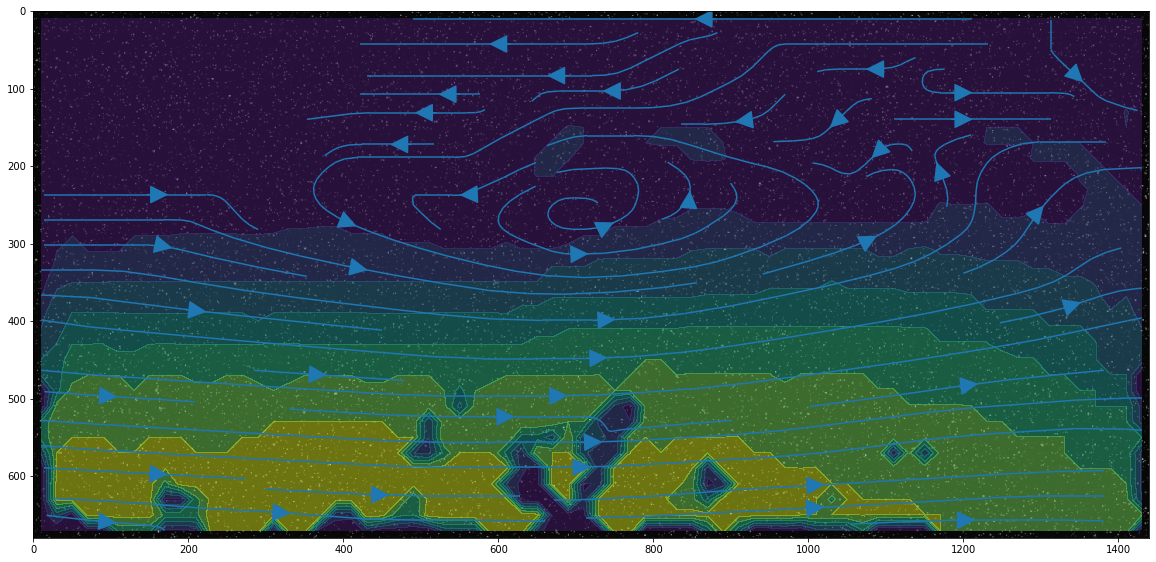

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread(path1)[:X.shape[0]*size_interr,:Y.shape[1]*size_interr], cmap='gray', vmin=0, vmax=255)

plt.contourf(X*size_interr+size_interr//2,Y*size_interr+size_interr//2, np.sqrt(U_med**2 + V_med**2), alpha=0.5)
plt.streamplot(X*size_interr+size_interr//2, Y*size_interr+size_interr//2, U_med, V_med, density=0.75, arrowsize=4)

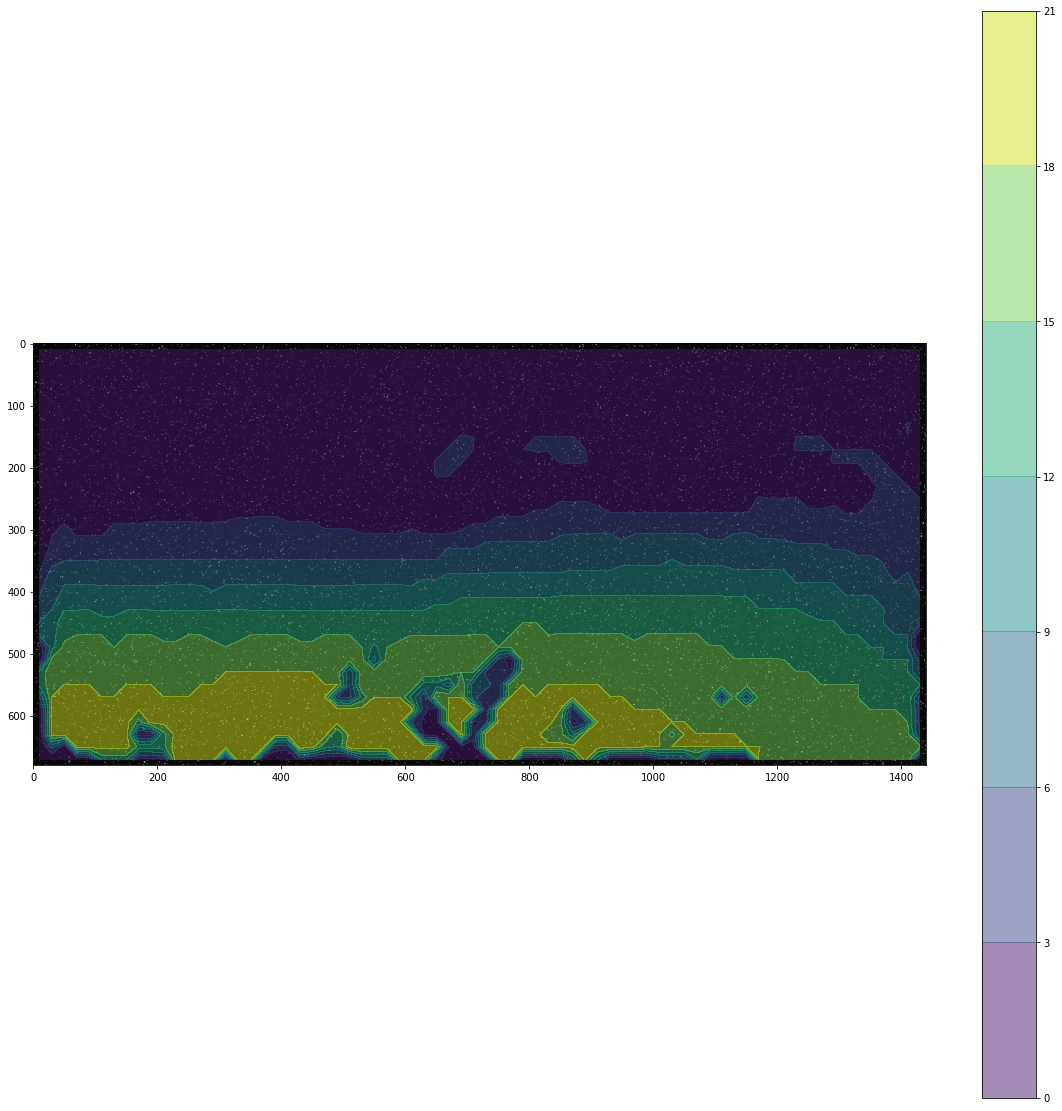

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread(path1)[:X.shape[0]*size_interr,:Y.shape[1]*size_interr], cmap='gray', vmin=0, vmax=255)

plt.contourf(X*size_interr+size_interr//2,Y*size_interr+size_interr//2, np.sqrt(U_med**2 + V_med**2), alpha=0.5)
plt.colorbar()

**5) Zusatzaufgaben (freiwillig):**
  * Fügen Sie einen optionalen Parameter "overlap" – und die entsprechende Implementierung – für überlappende Interrogationsfenster hinzu.
  * Aktuell können nur Geschwindigkeits-Vektoren mit Pixelgenauigkeit gefunden werden. Überlegen Sie, ob bzw. wie genauere Werte berechnet werden könnten.
  * Wie könnte das Ergebnis verbessert werden, die auftretenden Geschwindigkeiten stark variieren?